# Analyse de la donnée - Statistiques

Ce playbook a pour objectif de comprendre notre dataset. Pour cela, nous calculons des statistiques descriptives sur dessus telles que la moyenne, la médiane, l'écart type, le minimum et le maximum certaines les variables numériques comme la durée moyenne du trajet, le nombre de retards au départ, etc.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [21]:
# Lecture de la base de données
script_dir = os.path.abspath('')
relative_path = '../dataset/regularite-mensuelle-tgv-aqst.csv'
csv_path = os.path.join(script_dir, relative_path)
data = pd.read_csv(csv_path, delimiter=";")

## L'importance de la gare de départ et d'arrivée dans le retard du train

Qu'elle est l'importance d'une gare dans le retard ? Est-ce qu'une gare qui accumule beaucoup de retards les accumules à cause des retards au départ depuis les autres gare ou est ce seulement à leur arrivée dans cette gare que les trains ont pris du retard ?

Statistiques des Gares de Départ:
                    Gare de Départ  Nombre de Retards au Départ  \
0              AIX EN PROVENCE TGV                        14061   
1                ANGERS SAINT LAUD                        14858   
2                        ANGOULEME                         9191   
3                           ANNECY                          632   
4                            ARRAS                        11271   
5                      AVIGNON TGV                        12865   
6                        BARCELONA                         1228   
7                 BELLEGARDE (AIN)                         6563   
8       BESANCON FRANCHE COMTE TGV                         3440   
9                 BORDEAUX ST JEAN                        19779   
10                           BREST                         2753   
11       CHAMBERY CHALLES LES EAUX                         8271   
12                     DIJON VILLE                        12415   
13                          

C:\Users\Romain\AppData\Local\Temp\ipykernel_27012\1514071897.py:30: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  departure_vs_arrival_correlation = data[['gare_depart', 'gare_arrivee', 'nb_train_depart_retard', 'nb_train_retard_arrivee']].corr()


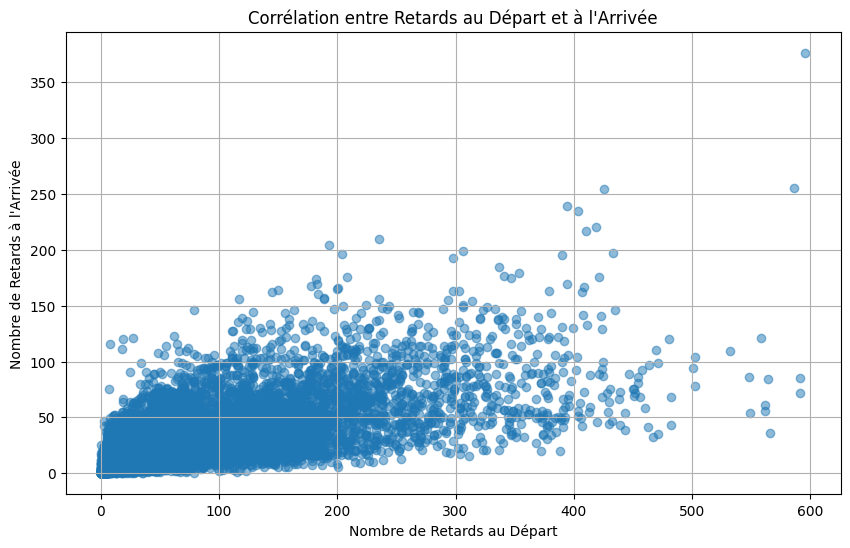

In [23]:
# Analyse des gares de départ
departure_stats = data.groupby('gare_depart').agg({
    'nb_train_depart_retard': 'sum',
    'nb_train_retard_arrivee': 'sum',
    'nb_train_prevu': 'count'
}).reset_index()

# Renommer les colonnes
departure_stats.columns = ['Gare de Départ', 'Nombre de Retards au Départ', 'Nombre de Retards à l\'Arrivée', 'Nombre de Trajets']

# Afficher les statistiques des gares de départ
print("Statistiques des Gares de Départ:")
print(departure_stats)

# Analyse des gares d'arrivée
arrival_stats = data.groupby('gare_arrivee').agg({
    'nb_train_depart_retard': 'sum',
    'nb_train_retard_arrivee': 'sum',
    'nb_train_prevu': 'count'
}).reset_index()

# Renommer les colonnes
arrival_stats.columns = ['Gare d\'Arrivée', 'Nombre de Retards au Départ', 'Nombre de Retards à l\'Arrivée', 'Nombre de Trajets']

# Afficher les statistiques des gares d'arrivée
print("\nStatistiques des Gares d'Arrivée:")
print(arrival_stats)

# Corrélation entre les gares de départ et d'arrivée
departure_vs_arrival_correlation = data[['gare_depart', 'gare_arrivee', 'nb_train_depart_retard', 'nb_train_retard_arrivee']].corr()

# Afficher la matrice de corrélation
print("\nMatrice de Corrélation entre Gares de Départ et d'Arrivée:")
print(departure_vs_arrival_correlation)

# Visualisation
plt.figure(figsize=(10, 6))
plt.scatter(data['nb_train_depart_retard'], data['nb_train_retard_arrivee'], alpha=0.5)
plt.xlabel('Nombre de Retards au Départ')
plt.ylabel('Nombre de Retards à l\'Arrivée')
plt.title('Corrélation entre Retards au Départ et à l\'Arrivée')
plt.grid(True)
plt.show()
